<a href="https://colab.research.google.com/github/jcmachicao/pucp__gobierno_sistemas_proyectos/blob/main/pucp_men623__earned_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Project Simulation with Physical Units and Earned Value Management (EVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
total_scope_units = 1000  # e.g., m³, km, etc.
total_budget = 500000     # in currency units
unit_name = "m³"

In [13]:
# Number of periods to simulate
n_periods = 20

In [27]:
# --- Generate Per-Period Values (not cumulative) ---
real_scope_period = np.random.uniform(50, 120, size=n_periods)
planned_scope_period = np.random.uniform(80, 120, size=n_periods)
actual_cost_period = np.random.uniform(30000, 70000, n_periods)

# --- Cumulative Calculations with Clipping ---
real_scope_cum = np.cumsum(real_scope_period)
real_scope_cum = np.clip(real_scope_cum, 0, total_scope_units)
real_scope_period = np.diff(np.insert(real_scope_cum, 0, 0))

planned_scope_cum = np.cumsum(planned_scope_period)
planned_scope_cum = np.clip(planned_scope_cum, 0, total_scope_units)
planned_scope_period = np.diff(np.insert(planned_scope_cum, 0, 0))

actual_cost_cum = np.cumsum(actual_cost_period)
actual_cost_period = np.diff(np.insert(actual_cost_cum, 0, 0))

In [29]:
df = pd.DataFrame({
    "Period": np.arange(1, n_periods + 1),
    f"Real Scope ({unit_name})": real_scope_period,
    f"Planned Scope ({unit_name})": planned_scope_period,
    "Actual Cost ($)": actual_cost_period,
    f"Cumulative Real Scope ({unit_name})": real_scope_cum,
    f"Cumulative Planned Scope ({unit_name})": planned_scope_cum,
    "Cumulative Actual Cost ($)": actual_cost_cum
})

In [37]:
# EV and PV in money terms
df["EV ($)"] = (df[f"Cumulative Real Scope ({unit_name})"] / total_scope_units) * total_budget
df["PV ($)"] = (df[f"Cumulative Planned Scope ({unit_name})"] / total_scope_units) * total_budget

# Planned Cost = EV in $
df["Planned Cost (PC)"] = df["EV ($)"]

In [38]:
# Performance Indices
df["CPI"] = df["EV ($)"] / df["Cumulative Actual Cost ($)"]
df["SPI"] = df[f"Cumulative Real Scope ({unit_name})"] / df[f"Cumulative Planned Scope ({unit_name})"]

# ETC and EAC
df["ETC ($)"] = (total_budget - df["EV ($)"]) / df["CPI"]
df["EAC ($)"] = df["Cumulative Actual Cost ($)"] + df["ETC ($)"]

# Clean up any inf/nan from division
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# --- Output Table ---
pd.set_option("display.float_format", "{:,.2f}".format)
display(df)

,Period,Real Scope (m³),Planned Scope (m³),Actual Cost ($),Cumulative Real Scope (m³),Cumulative Planned Scope (m³),Cumulative Actual Cost ($),EV ($),PV ($),Planned Cost (PC),CPI,SPI,ETC ($),EAC ($)
0,1,70.61,112.37,"31,220.01",70.61,112.37,"31,220.01","35,305.71","56,187.22","35,305.71",1.13,0.63,"410,918.23","442,138.24"
1,2,76.96,112.40,"31,493.93",147.57,224.78,"62,713.94","73,784.13","112,389.49","73,784.13",1.18,0.66,"362,268.62","424,982.55"
2,3,109.58,114.68,"62,904.02",257.15,339.46,"125,617.96","128,573.92","169,730.94","128,573.92",1.02,0.76,"362,886.88","488,504.84"
3,4,72.18,116.53,"44,407.63",329.33,455.99,"170,025.59","164,666.19","227,995.75","164,666.19",0.97,0.72,"346,247.94","516,273.53"
4,5,61.86,100.45,"35,082.42",391.20,556.45,"205,108.01","195,598.43","278,222.60","195,598.43",0.95,0.70,"319,200.92","524,308.92"
5,6,88.98,100.06,"50,889.73",480.17,656.51,"255,997.74","240,086.48","328,252.92","240,086.48",0.94,0.73,"277,138.78","533,136.52"
6,7,115.53,111.93,"60,799.74",595.70,768.44,"316,797.48","297,851.89","384,218.83","297,851.89",0.94,0.78,"215,006.22","531,803.70"
7,8,98.72,106.00,"38,632.84",694.43,874.44,"355,430.32","347,212.94","437,218.10","347,212.94",0.98,0.79,"156,403.03","511,833.35"
8,9,89.90,108.08,"54,915.62",784.33,982.51,"410,345.94","392,165.08","491,257.44","392,165.08",0.96,0.80,"112,834.17","523,180.11"
9,10,56.80,17.49,"33,413.90",841.13,"1,000.00","443,759.84","420,566.25","500,000.00","420,566.25",0.95,0.84,"83,814.40","527,574.23"


In [39]:
# Find the index of the first row where SPI == 1
first_spi_one_index = df[df['SPI'] == 1].index.min()
if pd.notna(first_spi_one_index):
  filtered_df = df.loc[:first_spi_one_index] # Filter the DataFrame up to and including the first occurrence
  display(filtered_df)
else:
  print("No row found with SPI equal to 1.")

,Period,Real Scope (m³),Planned Scope (m³),Actual Cost ($),Cumulative Real Scope (m³),Cumulative Planned Scope (m³),Cumulative Actual Cost ($),EV ($),PV ($),Planned Cost (PC),CPI,SPI,ETC ($),EAC ($)
0,1,70.61,112.37,"31,220.01",70.61,112.37,"31,220.01","35,305.71","56,187.22","35,305.71",1.13,0.63,"410,918.23","442,138.24"
1,2,76.96,112.40,"31,493.93",147.57,224.78,"62,713.94","73,784.13","112,389.49","73,784.13",1.18,0.66,"362,268.62","424,982.55"
2,3,109.58,114.68,"62,904.02",257.15,339.46,"125,617.96","128,573.92","169,730.94","128,573.92",1.02,0.76,"362,886.88","488,504.84"
3,4,72.18,116.53,"44,407.63",329.33,455.99,"170,025.59","164,666.19","227,995.75","164,666.19",0.97,0.72,"346,247.94","516,273.53"
4,5,61.86,100.45,"35,082.42",391.20,556.45,"205,108.01","195,598.43","278,222.60","195,598.43",0.95,0.70,"319,200.92","524,308.92"
5,6,88.98,100.06,"50,889.73",480.17,656.51,"255,997.74","240,086.48","328,252.92","240,086.48",0.94,0.73,"277,138.78","533,136.52"
6,7,115.53,111.93,"60,799.74",595.70,768.44,"316,797.48","297,851.89","384,218.83","297,851.89",0.94,0.78,"215,006.22","531,803.70"
7,8,98.72,106.00,"38,632.84",694.43,874.44,"355,430.32","347,212.94","437,218.10","347,212.94",0.98,0.79,"156,403.03","511,833.35"
8,9,89.90,108.08,"54,915.62",784.33,982.51,"410,345.94","392,165.08","491,257.44","392,165.08",0.96,0.80,"112,834.17","523,180.11"
9,10,56.80,17.49,"33,413.90",841.13,"1,000.00","443,759.84","420,566.25","500,000.00","420,566.25",0.95,0.84,"83,814.40","527,574.23"


In [40]:
df = filtered_df

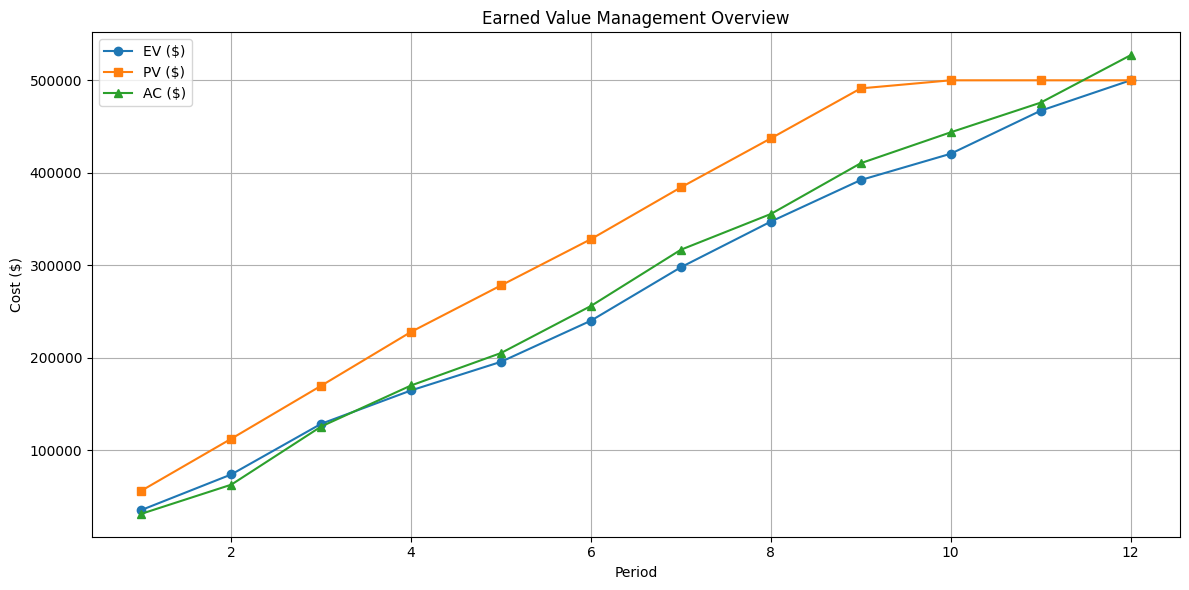

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df["Period"], df["EV ($)"], label="EV ($)", marker='o')
plt.plot(df["Period"], df["PV ($)"], label="PV ($)", marker='s')
plt.plot(df["Period"], df["Cumulative Actual Cost ($)"], label="AC ($)", marker='^')
plt.title("Earned Value Management Overview")
plt.xlabel("Period")
plt.ylabel("Cost ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

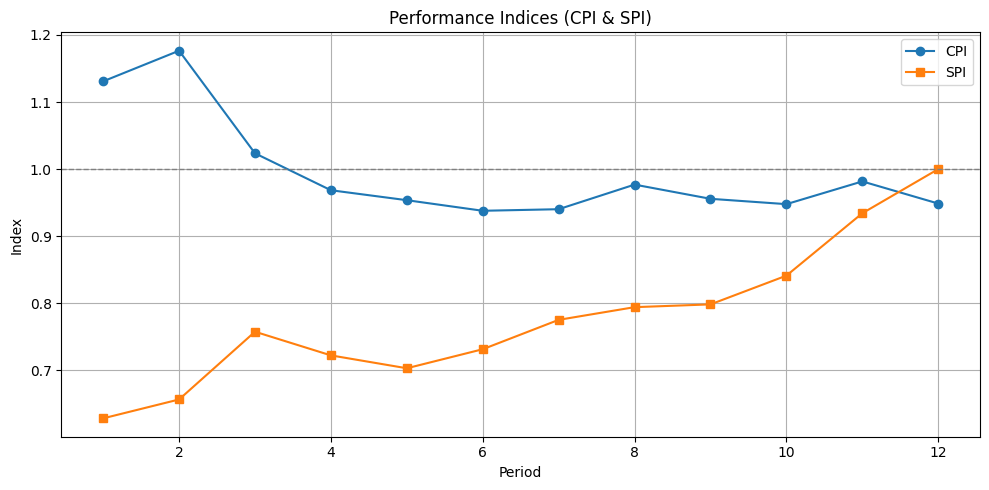

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(df["Period"], df["CPI"], label="CPI", marker='o')
plt.plot(df["Period"], df["SPI"], label="SPI", marker='s')
plt.axhline(1.0, color='gray', linestyle='--', linewidth=1)
plt.title("Performance Indices (CPI & SPI)")
plt.xlabel("Period")
plt.ylabel("Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()